In [3]:
import pandas as pd
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

os.chdir('C:\\Users\\Antonio\\OneDrive - Instituto Superior de Estatística e Gestão de Informação\\Bootcamp\\Back orders\\data')

# Read in data and look at the dataframe

In [4]:
%time train = pd.read_csv('Training_Dataset_v2.csv', low_memory=False)

Wall time: 9.53 s


In [49]:
%time train.sample(10)

Wall time: 221 ms


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1617983,3214927,92.0,8.0,40.0,120.0,240.0,360.0,70.0,200.0,373.0,...,0.0,0.98,0.97,0.0,No,No,No,Yes,No,No
1025986,1383521,10.0,12.0,0.0,5.0,5.0,5.0,0.0,0.0,0.0,...,0.0,0.58,0.58,0.0,Yes,No,No,Yes,No,No
1073054,1434015,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.37,0.38,0.0,No,No,No,Yes,No,No
390352,1738314,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.68,0.66,0.0,No,No,No,Yes,No,No
1343165,2928912,312.0,8.0,0.0,0.0,0.0,0.0,2.0,5.0,15.0,...,0.0,0.96,0.81,0.0,Yes,No,Yes,Yes,No,No
126696,1238214,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.93,0.97,0.0,Yes,No,No,Yes,No,No
62548,1174043,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1244478,2826227,11.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.00,0.92,0.0,No,No,No,Yes,No,No
1126796,1491562,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.42,0.36,0.0,No,No,No,Yes,No,No
386964,1734925,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.73,0.78,0.0,Yes,No,No,Yes,No,No


In [50]:
train.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [51]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


In [52]:
train.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

 - There's one line with missing values, and we can delete that. Additionally, there are some missing values for `lead_time`, which is consistent with the variable description which states "if available". For now, we can assign a large number to missing values of `lead_time`.

# Let's transform categorical variables, and replace missing values in `lead_time`

In [5]:
train=train.dropna(thresh=5) # this will drop any rows with more than 5 missing values in columns

In [64]:
train.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
bo_cat               0
dtype: int64

In [6]:
train.lead_time.fillna(99999,inplace=True) # repalce missing values in `lead_time` with 99999

 - also, let's encode categorical variables with 'Yes' and 'No' into 0 and 1, while keeping a copy of the categorical `went_on_backorder`

In [7]:
train['bo_cat'] = train.went_on_backorder

In [8]:
TrueFalse= {'Yes': 1, 'No':0}

train.deck_risk=[TrueFalse[item] for item in train.deck_risk]
train.potential_issue=[TrueFalse[item] for item in train.potential_issue]
train.oe_constraint=[TrueFalse[item] for item in train.oe_constraint]
train.ppap_risk=[TrueFalse[item] for item in train.ppap_risk]
train.stop_auto_buy =[TrueFalse[item] for item in train.stop_auto_buy ]
train.rev_stop=[TrueFalse[item] for item in train.rev_stop]
train.went_on_backorder=[TrueFalse[item] for item in train.went_on_backorder]

# Now we can check how variables look like among products that were and weren't back ordered

In [63]:
df1=pd.pivot_table(train, index = ["went_on_backorder"],aggfunc = 'mean').T
df2=pd.pivot_table(train, index = ["went_on_backorder"],aggfunc = 'std').T
pd.concat([df1, df2, df2/df1], axis=1)

went_on_backorder,0,1,0,1,0,1
deck_risk,0.229974,0.169663,0.420816,0.375353,1.829841,2.212348
forecast_3_month,178.259421,157.314354,5041.668512,1634.781769,28.282760,10.391816
forecast_6_month,345.662315,244.678916,9826.013034,2457.176079,28.426625,10.042451
forecast_9_month,507.579735,325.939520,14424.952051,3145.250001,28.419086,9.649796
in_transit_qty,44.319523,4.338617,1347.246791,47.313292,30.398495,10.905156
lead_time,6005.857867,2875.146374,23743.817774,16692.990057,3.953443,5.805962
local_bo_qty,0.600148,4.531391,33.448522,62.062589,55.733808,13.696145
min_bank,52.964627,24.219782,1259.144105,145.151363,23.773303,5.993091
national_inv,499.309119,21.432746,29714.739833,608.192119,59.511711,28.376771
oe_constraint,0.000141,0.000708,0.011889,0.026608,84.101882,37.559951


  - It seems that, for some variables, the distribution doesn't vary much between the 2 classes: `deck_risk` (?), `oe_constraint` (?), `potential_issue` (?), `ppap_risk` (?), `rev_stop` (?) and `stop_auto_buy`. Aside from `potential_issue`, these seem to be risk flags for the parts in inventory. It could mean that risk flags are unrelated with order/inventory pattern in the products. `potential_issue`s are rarely identified.
 <br>
  - What this means for us is that perhaps we don't have to use these variables in our model as they might not be very informative.

In [17]:
train.sku.loc[(train.lead_time==99999) & (train.went_on_backorder==1)].count() / train.sku.loc[(train.went_on_backorder==1)].count()

0.02869033914814487

In [18]:
train.sku.loc[(train.lead_time==99999) & (train.went_on_backorder==0)].count() / train.sku.loc[(train.went_on_backorder==0)].count()

0.059985076647697345

 - Number of missing values for `lead_time` is a bit different between back ordered (3%) and non BO products (6%). Are products with missing `lead_time` less likely to be backordered?

In [19]:
train.sku.loc[(train.lead_time==99999) & (train.went_on_backorder==1)].count() / train.sku.loc[(train.lead_time==99999)].count()

0.0032113228866224616

In [21]:
train.sku.loc[(train.lead_time==99999) & (train.went_on_backorder==1)].count()

324

In [20]:
train.sku.loc[(train.lead_time==99999) & (train.went_on_backorder==0)].count() / train.sku.loc[(train.lead_time==99999)].count()

0.9967886771133775

 - 99.7% of products without `lead_time` did not go into backorder. Perhaps this can be an important predictor of not being backordered? (if `lead_time` being unavailable means that the product cannot be shipped, then placing back orders on the product may not be allowed)

In [27]:
pd.concat([train.loc[(train.lead_time==99999) & (train.went_on_backorder==0)].describe().T,train.loc[(train.lead_time==99999) & (train.went_on_backorder==1)].describe().T],axis=0)

,count,mean,std,min,25%,50%,75%,max
national_inv,100569.0,601.785053,8799.894525,-4573.0,4.0,22.0,113.00,917218.0
lead_time,100569.0,99999.000000,0.000000,99999.0,99999.0,99999.0,99999.00,99999.0
in_transit_qty,100569.0,21.674532,1790.333750,0.0,0.0,0.0,0.00,285365.0
forecast_3_month,100569.0,10.688264,336.038922,0.0,0.0,0.0,0.00,35792.0
forecast_6_month,100569.0,24.500890,747.238237,0.0,0.0,0.0,0.00,74986.0
forecast_9_month,100569.0,35.409828,1120.583300,0.0,0.0,0.0,0.00,112141.0
sales_1_month,100569.0,40.275353,2848.176966,0.0,0.0,0.0,1.00,361803.0
sales_3_month,100569.0,120.264942,7907.315690,0.0,0.0,0.0,4.00,1100523.0
sales_6_month,100569.0,175.793326,8517.067414,0.0,0.0,1.0,8.00,1309162.0
sales_9_month,100569.0,227.440146,8604.485143,0.0,0.0,1.0,13.00,1309162.0


 - these products with missing `lead_time` might be discontinued. Given that sales forecast variables tend to zero or very low most of the time.

In [30]:
pd.concat([train.loc[(train.lead_time==99999)].describe().T,train.describe().T],axis=0)

,count,mean,std,min,25%,50%,75%,max
national_inv,100893.0,599.955507,8785.828101,-4573.0,4.00,22.00,113.00,917218.0
lead_time,100893.0,99999.000000,0.000000,99999.0,99999.00,99999.00,99999.00,99999.0
in_transit_qty,100893.0,21.670879,1787.484665,0.0,0.00,0.00,0.00,285365.0
forecast_3_month,100893.0,11.002894,338.081913,0.0,0.00,0.00,0.00,35792.0
forecast_6_month,100893.0,24.860258,747.502334,0.0,0.00,0.00,0.00,74986.0
forecast_9_month,100893.0,35.814338,1120.038314,0.0,0.00,0.00,0.00,112141.0
sales_1_month,100893.0,40.427582,2843.686242,0.0,0.00,0.00,1.00,361803.0
sales_3_month,100893.0,120.640530,7894.806084,0.0,0.00,0.00,4.00,1100523.0
sales_6_month,100893.0,176.524585,8503.945769,0.0,0.00,1.00,8.00,1309162.0
sales_9_month,100893.0,228.656547,8592.102577,0.0,0.00,1.00,13.00,1309162.0


# Let's do some plotting to understand linear relations

In [9]:
train_full=train.loc[(train.lead_time!=99999)]

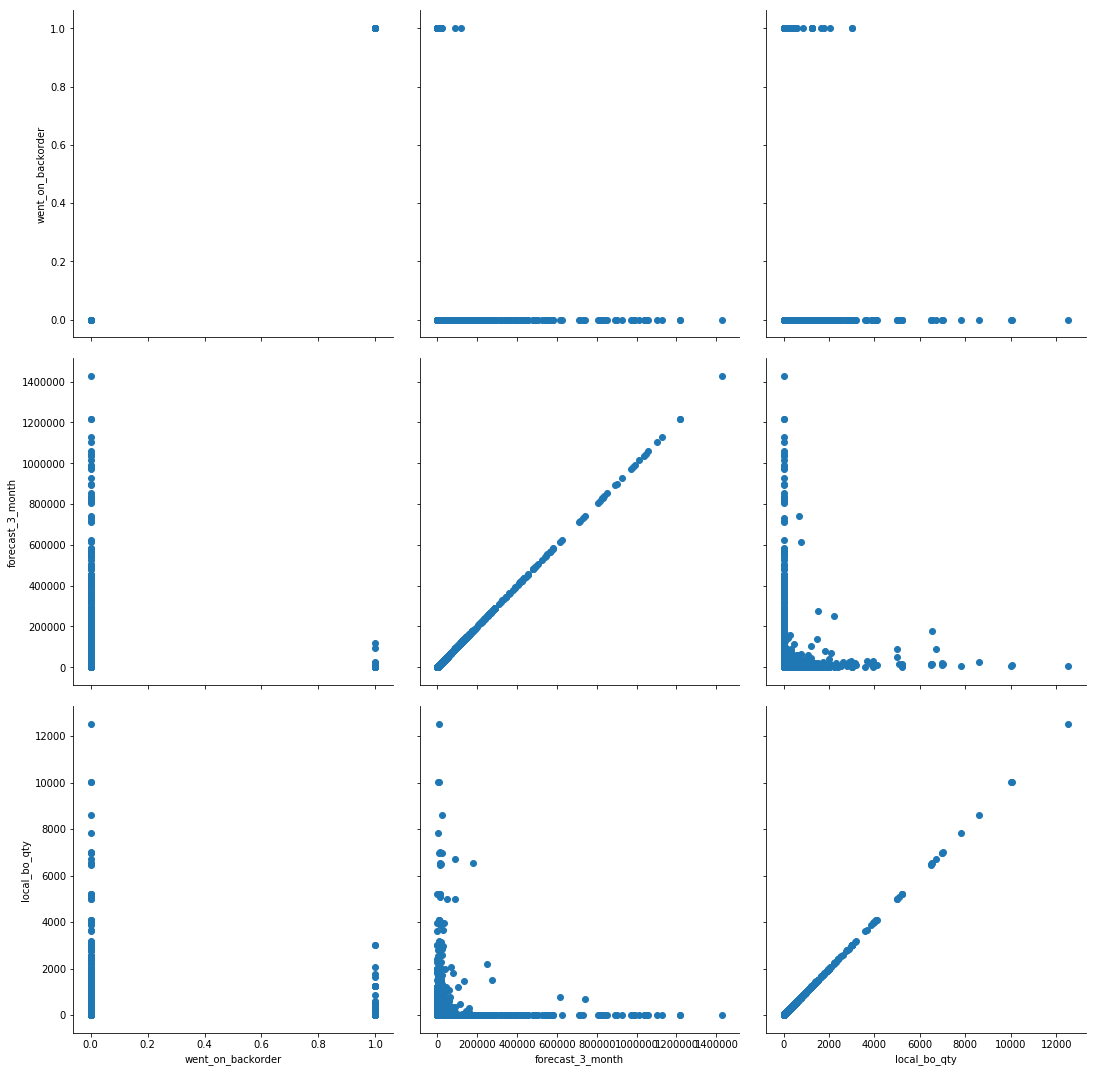

In [27]:
g = sns.PairGrid(train_full, vars=["went_on_backorder","forecast_3_month","local_bo_qty"],height=5)
g = g.map(plt.scatter)

# Just to clarify the relation between `lead_time`and `perf_12_month_avg`...

In [20]:
train.loc[(train.lead_time==99999)]['perf_12_month_avg'].describe()

count    100893.0
mean        -99.0
std           0.0
min         -99.0
25%         -99.0
50%         -99.0
75%         -99.0
max         -99.0
Name: perf_12_month_avg, dtype: float64

In [21]:
train.loc[(train.lead_time==99999)]['perf_6_month_avg'].describe()

count    100893.0
mean        -99.0
std           0.0
min         -99.0
25%         -99.0
50%         -99.0
75%         -99.0
max         -99.0
Name: perf_6_month_avg, dtype: float64

In [22]:
train.loc[(train.perf_12_month_avg==-99)].describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1.220500e+05,122050.000000,122050.000000,122050.000000,122050.000000,122050.000000,122050.000000,1.220500e+05,1.220500e+05,1.220500e+05,...,122050.000000,122050.0,122050.0,122050.000000,122050.000000,122050.0,122050.000000,122050.000000,122050.000000,122050.000000
mean,1.636418e+03,82666.953322,23.475576,22.102548,47.902048,74.330938,39.681114,1.226032e+02,1.969761e+02,2.739185e+02,...,0.501975,-99.0,-99.0,0.460279,0.586071,0.0,0.164924,0.800287,0.002966,0.003236
std,9.475251e+04,37849.061203,1644.574213,471.413144,1111.629403,1986.319458,2613.379596,7.338754e+03,8.632413e+03,1.028149e+04,...,73.857743,0.0,0.0,34.595405,0.492538,0.0,0.371114,0.399786,0.054380,0.056797
min,-4.573000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,-99.0,-99.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,4.000000e+00,99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,-99.0,-99.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
50%,2.500000e+01,99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000,-99.0,-99.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000
75%,1.370000e+02,99999.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000e+00,9.000000e+00,1.300000e+01,...,0.000000,-99.0,-99.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000
max,1.233440e+07,99999.000000,285365.000000,38748.000000,104400.000000,226200.000000,361803.000000,1.100523e+06,1.309162e+06,1.309162e+06,...,25000.000000,-99.0,-99.0,7048.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [10]:
train.sku.loc[(train.perf_12_month_avg==-99) & (train.lead_time<99999)].count()

21157

In [11]:
train.sku.loc[(train.perf_6_month_avg==-99) & (train.lead_time<99999)].count()

28585

# EXP 1: Trying out SMOTE on a Random forest regressor

In [25]:
train_full.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue        int64
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk              int64
oe_constraint          int64
ppap_risk              int64
stop_auto_buy          int64
rev_stop               int64
went_on_backorder      int64
bo_cat                object
dtype: object

In [20]:
feats=train_full[['national_inv',
                 'lead_time',
                 'in_transit_qty',
                 'forecast_3_month',
                 'sales_6_month',
                 'min_bank',
                 'potential_issue',
                 'pieces_past_due',
                'perf_6_month_avg',
                'local_bo_qty']]

In [21]:
target=train_full.went_on_backorder

 - we need to standardize our variables before applying SMOTE, and it will be easier to do so before 

In [35]:
names = feats.columns
normalized_feats = preprocessing.normalize(feats)
feats = pd.DataFrame(normalized_feats, columns=names)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, random_state=0, test_size=0.25)

In [58]:
y_train[y_train==1].count()/y_train.count()

0.0069247411203764

In [62]:
train.sku[train.went_on_backorder==1].count()/train.sku.count()

0.006690720794378681

In [15]:
sm = SMOTE(ratio=0.3, random_state=10)

In [16]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [96]:
pd.Series(y_train_res).value_counts()

0    1181983
1     354594
dtype: int64

In [17]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)

In [18]:
%time clf.fit(X_train_res, y_train_res)

Wall time: 13min 21s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
preds = clf.predict(X_test)

In [107]:
((preds == y_test) & (preds == 1)).sum() / (y_test == 1).sum()

0.7264393105977265

In [114]:
s1=pd.Series(clf.feature_importances_)
s2=pd.Series(X_train.columns)
importance=pd.DataFrame(data=pd.concat([s2, s1], axis=1))
importance.sort_values(by=[1],ascending=False)

,0,1
0,national_inv,0.447492
3,forecast_3_month,0.208494
4,sales_6_month,0.122057
2,in_transit_qty,0.064424
8,perf_6_month_avg,0.044507
1,lead_time,0.044198
9,local_bo_qty,0.042451
5,min_bank,0.015659
7,pieces_past_due,0.010557
6,potential_issue,0.000160


In [20]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    394015
           1       0.09      0.73      0.16      2727

   micro avg       0.95      0.95      0.95    396742
   macro avg       0.54      0.84      0.57    396742
weighted avg       0.99      0.95      0.97    396742



In [21]:
print(confusion_matrix(y_test, preds))

[[374324  19691]
 [   746   1981]]


In [22]:
roc_auc_score(y_test, preds)

0.838232027924271

 - note: the $AUC$ equals the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one, i.e., the likelihood that a backorderd product is ranked higher than a non backordered one.

# EXP 2: Let's now try the same random forest with all features

In [10]:
feats_all=train_full.drop(['went_on_backorder','bo_cat','sku'],axis=1)

In [11]:
names = feats_all.columns
normalized_feats = preprocessing.normalize(feats_all)
feats_all = pd.DataFrame(normalized_feats, columns=names)

In [14]:
target=train_full.went_on_backorder

In [15]:
X_train, X_test, y_train, y_test = train_test_split(feats_all, target, random_state=0, test_size=0.25)

In [131]:
y_train[y_train==1].count()/y_train.count()

0.0069247411203764

In [16]:
sm = SMOTE(ratio=0.3, random_state=10)

In [19]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [20]:
pd.Series(y_train_res).value_counts()

0    1181983
1     354594
dtype: int64

In [15]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0,n_jobs=-1)

In [22]:
%time clf.fit(X_train_res, y_train_res)

Wall time: 15min 54s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
preds = clf.predict(X_test)

In [24]:
((preds == y_test) & (preds == 1)).sum() / (y_test == 1).sum()

0.7198386505317198

 - the model with all features performs more poorly than the model with a few selected features

In [142]:
s1=pd.Series(clf.feature_importances_)*10
s2=pd.Series(X_train.columns)
importance=pd.DataFrame(data=pd.concat([s2, s1], axis=1))
importance.sort_values(by=[1],ascending=False)

,0,1
0,national_inv,3.541358
3,forecast_3_month,1.426737
4,forecast_6_month,1.077160
5,forecast_9_month,0.575419
2,in_transit_qty,0.499418
6,sales_1_month,0.497023
7,sales_3_month,0.410780
19,stop_auto_buy,0.300935
15,local_bo_qty,0.276438
8,sales_6_month,0.241315


 - `stop_auto_buy` is more relevant than it seemed in the beginning! We should include it.
 - the remaining 'yes' and 'no' variables are irrelevant.
 - `sale_1_month` is more relevant than the remaining sales variables.
 - `perf_6_month_avg` is more relevant than `perf_12_month_avg`.
 - `forecast_3_month` is the most relevant forecast variable indeed.
 - the question is: should we cut on correlated variables as we did before?

In [25]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    394015
           1       0.11      0.72      0.19      2727

   micro avg       0.96      0.96      0.96    396742
   macro avg       0.55      0.84      0.58    396742
weighted avg       0.99      0.96      0.97    396742



In [26]:
roc_auc_score(y_test, preds)

0.8389416975105715

In [29]:
(preds==1).sum()

18494

In [30]:
(y_test==1).sum()

2727

# EXP 3: Let's try SMOTE with the initial small set of features but with less 1's (SMOTE ratio at 10%)

In [12]:
feats=train_full[['national_inv',
                 'lead_time',
                 'in_transit_qty',
                 'forecast_3_month',
                 'sales_6_month',
                 'min_bank',
                 'potential_issue',
                 'pieces_past_due',
                'perf_6_month_avg',
                'local_bo_qty',
                 'stop_auto_buy']]

In [13]:
target=train_full.went_on_backorder

In [14]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, random_state=0, test_size=0.25)
sm2 = SMOTE(ratio=0.1, random_state=10)
X_train_res, y_train_res = sm2.fit_sample(X_train, y_train)

In [41]:
pd.Series(y_train_res).value_counts()

0    1181983
1     118198
dtype: int64

In [16]:
%time clf.fit(X_train_res, y_train_res)

Wall time: 3min 1s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
preds = clf.predict(X_test)

In [18]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    394015
           1       0.21      0.37      0.27      2727

   micro avg       0.99      0.99      0.99    396742
   macro avg       0.60      0.68      0.63    396742
weighted avg       0.99      0.99      0.99    396742



In [19]:
((preds != y_test) & (preds == 1)).sum() / ((preds == y_test) & (preds == 1)).sum()

3.7818361303060217

In [20]:
print(confusion_matrix(y_test, preds))

[[390184   3831]
 [  1714   1013]]


In [22]:
roc_auc_score(y_test, preds)

0.6808737501458905

# EXP 3.1: try out without SMOTE

In [21]:
%time clf.fit(X_train, y_train)

Wall time: 2min 52s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
preds_basic = clf.predict(X_test)

In [24]:
print(classification_report(y_test, preds_basic))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    394015
           1       0.88      0.01      0.01      2727

   micro avg       0.99      0.99      0.99    396742
   macro avg       0.94      0.50      0.50    396742
weighted avg       0.99      0.99      0.99    396742



In [25]:
((preds_basic != y_test) & (preds_basic == 1)).sum() / ((preds_basic == y_test) & (preds_basic == 1)).sum()

0.13333333333333333

In [26]:
roc_auc_score(y_test, preds_basic)

0.5027477370530602

In [28]:
print(confusion_matrix(y_test, preds_basic))

[[394013      2]
 [  2712     15]]


# EXP 3.2: Try SMOTE but with 3% ratio

In [52]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, random_state=0, test_size=0.25)
sm2 = SMOTE(ratio=0.3, random_state=10)
X_train_res, y_train_res = sm2.fit_sample(X_train, y_train)

In [53]:
%time clf.fit(X_train_res, y_train_res)
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

Wall time: 3min 30s
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    394015
           1       0.10      0.65      0.17      2727

   micro avg       0.96      0.96      0.96    396742
   macro avg       0.55      0.80      0.58    396742
weighted avg       0.99      0.96      0.97    396742



In [54]:
((preds != y_test) & (preds == 1)).sum() / ((preds == y_test) & (preds == 1)).sum()

8.910532276330692

In [55]:
print(confusion_matrix(y_test, preds))

[[378279  15736]
 [   961   1766]]


In [56]:
roc_auc_score(y_test, preds)

0.8038302636569679

# EXP 4: Let's try SMOTE with the initial small set of features but with a lot of 1's (SMOTE ratio at 50%)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, random_state=0, test_size=0.25)
sm3 = SMOTE(ratio=0.5, random_state=10)
X_train_res, y_train_res = sm3.fit_sample(X_train, y_train)

In [30]:
%time clf.fit(X_train_res, y_train_res)

Wall time: 4min 30s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
preds = clf.predict(X_test)

In [32]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    394015
           1       0.07      0.76      0.13      2727

   micro avg       0.93      0.93      0.93    396742
   macro avg       0.53      0.84      0.55    396742
weighted avg       0.99      0.93      0.96    396742



In [33]:
roc_auc_score(y_test, preds)

0.8427939811438179

In [34]:
((preds != y_test) & (preds == 1)).sum() / ((preds == y_test) & (preds == 1)).sum()

13.29091792132103

In [36]:
print(confusion_matrix(y_test, preds))

[[366649  27366]
 [   668   2059]]


# EXP 5: Let's try XGBoost with the initial small set of features (SMOTE ratio at 10%). Also, let's try with a subset of the data first.

In [8]:
train_sub=train_full.sample(frac=0.1,random_state=42)

In [9]:
feats_sub=train_sub[['national_inv',
                 'lead_time',
                 'in_transit_qty',
                 'forecast_3_month',
                 'sales_6_month',
                 'min_bank',
                 'potential_issue',
                 'pieces_past_due',
                'perf_6_month_avg',
                'local_bo_qty']]

In [10]:
target_sub=train_sub.went_on_backorder

In [ ]:
names = feats_sub.columns
normalized_feats = preprocessing.normalize(feats_sub)
feats_sub = pd.DataFrame(normalized_feats, columns=names)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(feats_sub, target_sub, random_state=0, test_size=0.25)
sm2 = SMOTE(ratio=0.1, random_state=10)
X_train_res, y_train_res = sm2.fit_sample(X_train, y_train)

In [38]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

In [13]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [1, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 8, 10]
        }

In [14]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [15]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1', n_jobs=2, cv=skf.split(X_train_res, y_train_res), verbose=3, random_state=1001 )

In [16]:
%time random_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed: 39.3min finished


Wall time: 41min 58s


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000000810003D8B8>,
          error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=2,
          param_distributions={'min_child_weight': [1, 5, 10], 'gamma': [1, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [5, 8, 10]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='f1', verbose=3)

In [17]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=2, learning_rate=0.02, max_delta_step=0,
       max_depth=10, min_child_weight=5, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)

In [39]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=2, learning_rate=0.02, max_delta_step=0,
       max_depth=10, min_child_weight=5, missing=None, n_estimators=600,
       n_jobs=-1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, random_state=0, test_size=0.25)
sm2 = SMOTE(ratio=0.3, random_state=10)
X_train_res, y_train_res = sm2.fit_sample(X_train, y_train)

In [23]:
%time xgb.fit(X_train_res, y_train_res)

Wall time: 24min 58s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=2, learning_rate=0.02, max_delta_step=0,
       max_depth=10, min_child_weight=5, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)

In [25]:
X_test.columns = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

In [26]:
xgb_f1_preds = xgb.predict(X_test)

In [27]:
print(classification_report(y_test, xgb_f1_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    394015
           1       0.31      0.23      0.26      2727

   micro avg       0.99      0.99      0.99    396742
   macro avg       0.65      0.61      0.63    396742
weighted avg       0.99      0.99      0.99    396742



# EXP 5.1: Let's try XGBoost now maximizing AUC (recall will produce the same result as above). Also, let's use a different sample of the data and SMOTE ratio of 20%

In [45]:
train_sub=train_full.sample(frac=0.5,random_state=10)

In [46]:
feats_sub=train_sub[['national_inv',
                 'lead_time',
                 'in_transit_qty',
                 'forecast_3_month',
                 'sales_6_month',
                 'min_bank',
                 'potential_issue',
                 'pieces_past_due',
                'perf_6_month_avg',
                'local_bo_qty',
                    'stop_auto_buy']]

In [47]:
target_sub=train_sub.went_on_backorder

In [48]:
X_train, X_test, y_train, y_test = train_test_split(feats_sub, target_sub, random_state=0, test_size=0.25)
sm2 = SMOTE(ratio=0.2, random_state=10)
X_train_res, y_train_res = sm2.fit_sample(X_train, y_train)

In [49]:
params = {
        'gamma': [1, 1.5, 2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.02, 0.03, 0.04],
        }

In [50]:
xgb = XGBClassifier(n_estimators=600, max_depth=10, min_child_weight=5, objective='binary:logistic',
                    silent=True, nthread=1)

In [52]:
folds = 5
param_comb = 4

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb,
                                   scoring='roc_auc', n_jobs=2, cv=skf.split(X_train_res, y_train_res),
                                   verbose=3, random_state=1001 )

In [53]:
%time random_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed: 212.9min finished


Wall time: 3h 44min 46s


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000081310DFA98>,
          error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=5, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=4, n_jobs=2,
          param_distributions={'gamma': [1, 1.5, 2], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'learning_rate': [0.01, 0.02, 0.03, 0.04]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [54]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=1, learning_rate=0.03, max_delta_step=0,
       max_depth=10, min_child_weight=5, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [55]:
xgb_auc = random_search.best_estimator_

In [90]:
feats=train_full[['national_inv',
                 'lead_time',
                 'in_transit_qty',
                 'forecast_3_month',
                 'sales_1_month',
                 'min_bank',
                 'potential_issue',
                 'pieces_past_due',
                'perf_6_month_avg',
                'local_bo_qty',
                 'stop_auto_buy']]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, random_state=0, test_size=0.25)
sm2 = SMOTE(ratio=0.2, random_state=10)
X_train_res, y_train_res = sm2.fit_sample(X_train, y_train)

In [92]:
X_train_res=pd.DataFrame(X_train_res, columns=['national_inv',
                 'lead_time',
                 'in_transit_qty',
                 'forecast_3_month',
                 'sales_1_month',
                 'min_bank',
                 'potential_issue',
                 'pieces_past_due',
                'perf_6_month_avg',
                'local_bo_qty',
                 'stop_auto_buy'])

In [93]:
%time xgb_auc.fit(X_train_res, y_train_res)

Wall time: 26min 12s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=1, learning_rate=0.03, max_delta_step=0,
       max_depth=10, min_child_weight=5, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [77]:
X_test.columns = ['national_inv',
                 'lead_time',
                 'in_transit_qty',
                 'forecast_3_month',
                 'sales_6_month',
                 'min_bank',
                 'potential_issue',
                 'pieces_past_due',
                'perf_6_month_avg',
                'local_bo_qty',
                 'stop_auto_buy']

In [78]:
xgb_auc_preds = xgb_auc.predict(X_test)

In [79]:
print(classification_report(y_test, xgb_auc_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    394015
           1       0.27      0.30      0.28      2727

   micro avg       0.99      0.99      0.99    396742
   macro avg       0.63      0.65      0.64    396742
weighted avg       0.99      0.99      0.99    396742



# EXP 6: Back to random forest but SMOTE ratio of 100% (also, let's use the features we have found to be most relevant previously)

In [80]:
feats=train_full[['national_inv',
                 'lead_time',
                 'in_transit_qty',
                 'forecast_3_month',
                 'sales_1_month',
                 'min_bank',
                 'potential_issue',
                 'pieces_past_due',
                'perf_6_month_avg',
                'local_bo_qty',
                 'stop_auto_buy']]

In [81]:
target=train_full.went_on_backorder

In [82]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, random_state=42, test_size=0.25)
sm4 = SMOTE(ratio=1.0, random_state=42)
X_train_res, y_train_res = sm4.fit_sample(X_train, y_train)

In [84]:
X_train_res=pd.DataFrame(X_train_res, columns=['national_inv',
                 'lead_time',
                 'in_transit_qty',
                 'forecast_3_month',
                 'sales_1_month',
                 'min_bank',
                 'potential_issue',
                 'pieces_past_due',
                'perf_6_month_avg',
                'local_bo_qty',
                 'stop_auto_buy'])

In [83]:
clf = RandomForestClassifier(n_estimators=300, max_depth=10,random_state=0)

In [85]:
%time clf.fit(X_train_res, y_train_res)

Wall time: 43min 25s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [86]:
preds_lots1 = clf.predict(X_test)

In [87]:
print(classification_report(y_test, preds_lots1))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94    393941
           1       0.05      0.83      0.10      2801

   micro avg       0.89      0.89      0.89    396742
   macro avg       0.53      0.86      0.52    396742
weighted avg       0.99      0.89      0.94    396742



In [88]:
roc_auc_score(y_test, preds_lots1)

0.8646912292997814

In [94]:
preds_mix = clf.predict(X_test)*0.4 + xgb_auc.predict(X_test)*0.6

In [96]:
print(classification_report(y_test, preds_mix.round()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    394015
           1       0.25      0.25      0.25      2727

   micro avg       0.99      0.99      0.99    396742
   macro avg       0.62      0.62      0.62    396742
weighted avg       0.99      0.99      0.99    396742

